<a href="https://colab.research.google.com/github/NeuralCraft25/DataForge/blob/main/Insurance_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Health Insurance Costs: Notebook 2

This notebook expands the work done in the first.

You should keep the other notebook open and use it as a reference to help you when you get stuck.

Here we will:

1. Import all packages needed
1. Open the data
1. Graph some more of the data to see other features
1. Build a second simple linear regression model using another feature
1. Train and test it
1. Build a multiple linear regression model that uses two features
1. Train it
1. Test to see whether our model can predict most people's costs within $5000 or not
1. Demonstrate that training and test sets are not a perfect approach

# Notebook Two

## Step 1: Import all packages needed

We will need the same packages that we used last time:
* sys
* pandas
* graphing
* statsmodels.formula.api
* statsmodels.tools.eval_measures

This time we will make sure we give `statsmodels.formula.api` the nickname `smf` to avoid typing it out in full later on

### Instructions

Import the packages listed above and run the cell. Make sure that you give `statsmodels.formula.api` the nickname `smf`.

### Hints

See your last notebook on how to do this if you can't remember


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval


In [ ]:
# we are downloading some packages here for us to use graphing
!wget https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/graphing.py
# Replace question marks below with four lines
# of code to import the remaining four packages
# we need.
# When you do, remember to give
# statsmodels.formula.api the nickname smf
import sys
import pandas
import graphing

# ===========================================================
# You can ignore the code below. It will simply check your code
def check_imported(name):
    if name in sys.modules:
        print(f"Well done! {name} was imported successfully")
    else:
        print(f"{name} was not imported. Try again")
check_imported('pandas')
check_imported('graphing')
check_imported('statsmodels.formula.api')
check_imported('statsmodels.tools.eval_measures')

--2025-02-17 20:13:07--  https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18769 (18K) [text/plain]
Saving to: ‘graphing.py.1’

graphing.py.1       100%[===================>]  18.33K  --.-KB/s    in 0s      

2025-02-17 20:13:07 (116 MB/s) - ‘graphing.py.1’ saved [18769/18769]

Well done! pandas was imported successfully
Well done! graphing was imported successfully
Well done! statsmodels.formula.api was imported successfully
Well done! statsmodels.tools.eval_measures was imported successfully


## Step 2: Open the data

Let's open the data again. Our file is still where it was before - at `"data/insurance.csv"`

### Instructions
Complete the code below and run it.

This time we've left the line for you almost completely blank. See if you can do it without looking at your previous notebook.

### Hints
* We want to use pandas
* We want to use a method that can read a csv file
* The file location (third set of question marks) should stay in quotes


In [ ]:

# Complete the line below by replacing the question marks with code
data = pandas.read_csv('/content/insurance.csv')
import statsmodels.regression.linear_model as lm
# The next line just prints the table out to see
print(data)


# ===========================================================
# You can ignore the code below. It will simply check your code
if 'data' in locals() and type(data) is pandas.DataFrame:
    if data.size == 1366:
        print("It looks like you opened the wrong file")
    else:
        print("Well done! You opened the file")
else:
    print("Not quite right! Try again")

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
Well done! You opened the file


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 3: Graph Smoking Data

Last time we built a model that looked whether health insurance charges were higher for people who were older. It used age to predict health insurance charges.

This time, we will use smoking instead of age. That is, can we predict insurance charges based on whether people smoke?

Our first step should always be to take a look at the data. Let's do that now.

Look at the smoking column in the table printed above. You'll notice it doesn't say how much people smoke - it's just yes and no. That means we can't graph it easily using a scatter plot.

Instead, we can make a histogram of prices. In this case, the histogram will show how often people pay high prices, and how often they pay less. If smokers pay more, will might be able to see it.

### Instructions

We want to make a graph called a multiple histogram. The method is called `multiple_histogram`, which is inside of the `graphing` package.

1. Replace the first question marks with the name of the package for graphs
2. Replace the second question marks with the name of the method (see above)
3. Replace the third question marks with the name of your dataframe
4. Run the cell
5. Read the next text box that helps you understand the graph

### Hints
1. The name of the package and method are stated in the instructions
1. The name of your dataframe variable is in the previous cell. Look at the `print()` line to find it

In [ ]:
# Replace question marks so that this next line of code
# makes a multiple histogram of your data variable, using
# the graphing package
graphing.multiple_histogram(data, "charges", "smoker", title="charges by smoking status (red = smokers)")

Here, the x-axis is how much insurance costs, and the y-axis is how many people pay that price.

Take a look at the blue bars (non smokers). You can see the bars are very tall on the left, where charges are between $0 and about $15,000.

Now take a look at the red bars (smokers). There are fewer smokers in generally, but you can see the taller bars are between about $18,000 and $50,000.

From this we can deduce that smokers tend to pay higher health insurance charges. This suggests that we might be able to build a model that predicts charges based on whether people smoke not not.

## Step 4: Build a second simple linear regression model

In the previous notebook we built and trained a model that predicted charges based on people's ages. Let's repeat those steps now, but using smoking as the feature.

Smoking is a categorical feature, so normally we would choose another type of model for this. However, we do this here so that you can see that the `statsmodels` package can handle categorical data automatically.

We will need to write a short-hand equation for stats models. Last time we were predicting `charges` using `age`. Our short-hand equation was
```
charges ~ age
```
This time we want to predict `charges` (again) but using `smoking`

### Instructions

1. Read the code below and run the first cell. Notice that we've split the data into training and test for you
1. In the second cell, replace question marks so that your model is built. You should use `training_data` as the data and write the formula yourself
1. Run the second cell

### Hints
1. Look at your previous notebook to see how this is done if you can't recall
1. The package we want to use is called `smf` (the nickname we gave `statsmodels.formular.api`)
1. The method we want to use is called `ols`
1. Your formula should be in quotes "". It should be in the form `"label ~ feature"` (swap `label` for the label we are predicting and `feature` for the feature we are using)



In [ ]:
# Create a training data set
training_data = data.sample(frac=0.8)

# Create a testing data set
testing_data = data.drop(training_data.index)


In [ ]:
# Replace the two sets of question marks below
# so we can build the model

formula = 'charges ~ smoker'
untrained_model = smf.ols(formula = formula, data=training_data)

# ===========================================================
# You can ignore the code below. It will simply check your code
if 'untrained_model' in locals():
    if untrained_model.data.frame.size == 7490:
        print("Well done! Your model is ready to train")
    else:
        print("Try to use the training data. It looks like you used something else")
else:
    print("Not quite right! Try again")

Well done! Your model is ready to train


## Step 5: Train and test the model

We now need to train the model and see how well it predicts charges.

We will do this in three steps. You should **use your previous notebook as a reference** to help you through this.

The first step is to train the model.

### Instructions (1 of 3)


1. Replace question marks below so that we create a trained model
1. Run the cell

### Hint

Your untrained model is called `untrained_model`. The method we use to train the model is called `fit()`

In [ ]:
# Replace the question marks below with code
# that will train your model.
trained_model = untrained_model.fit()


# ===========================================================
# You can ignore the code below. It will simply check your code
if 'trained_model' in locals():
    print("Model trained!")
else:
    print("Try again")


Model trained!


Our second step is to use our trained model to make some predictions using the testing data. We will use these predictions to see how well the model works.


### Instructions (2 of 3)

1. Replace the question marks in the cell below to make some predictions of the *testing* data
1. Run the cell when ready

### Hints

* The first set of question marks is the name of the method to predict insurance costs. Look at your previous notebook if you cannot recall its name.
* Your testing dataframe is called `testing_data`

In [ ]:
# Replace question marks below so the code makes a prediction
# using your testing data
predicted_charges = trained_model.predict(testing_data)



# ===========================================================
# You can ignore the code below. It will simply check your code
if len(predicted_charges) == len(testing_data):
    print("predictions ready!")
else:
    print("not quite right. Did you use the correct data?")

predictions ready!


### Instructions (3 of 3)

1. Replace the question marks below with the name of the variable holding predicted costs
1. Run the cell to see how close the model is, on average, to the real costs.

### Hints
The predicted charges variable has a different name here to your previous notebook. You can find the name in the previous cell.

In [ ]:

# Get the correct answers
correct_answers = testing_data.charges

# Replace question marks below so that we can compare
# these correct answers to the predictions we have made
eval.meanabs(correct_answers, predicted_charges)

5692.252748170438

## Step 6: Build a multiple linear regression model

Our previous model was better than the one in our first notebook, but it wasn't good enough. Remember we want to predict costs within $5000 of the true value on average. Let's now combine these two models into one big model that uses both age and smoking status at the same time.

Our steps for this are the same:
1. Build the model
1. Train it
1. Test it

Let's start by building the model. When we want to write an equation with one variable we write this:
```
"label ~ feature"
```
When there is more than one feature, we use a `+` to join them
```
"label ~ feature + feature2"
```
Obviously, we replace `label` here with the label we are interested in (`charges`) and the two features with the two features we are interested in (`age` and `smoker`).

### Instructions
1. Replace the first *two* sets of question marks below with the name of the package and method we use to build our model.
1. Replace the question marks in the formula so that it uses the features `age` and `smoker`
1. Run the cell

### Hints
* The name and the package are the same as last time. See Step 4 to see how you did this.
* We've put the plus sign between the two features for you. All you need to do is swap out the question marks for their names.

In [ ]:
# Replace the question marks below so that the code builds a model using features
# age and gender
untrained_model = smf.ols(formula = "charges ~ age + smoker", data=training_data)


# ===========================================================
# You can ignore the code below. It will simply check your code
if ("age" in untrained_model.formula) and ("smoker" in untrained_model.formula):
    print("Well Done!")
else:
    print("Something's not quite right. Try again")

Well Done!


## Step 7: Train the multiple linear regression model

Just like before we will train our model. This code is just like before.

### Instructions
Replace the question marks below with code to train your model.

### Hints
* This is just like the first part of Step 5.
* Remember your model is called untrained_model

In [ ]:
trained_model = untrained_model.fit()
import statsmodels.regression.linear_model as lm


# ===========================================================
# You can ignore the code below. It will simply check your code
if type(trained_model) == lm.RegressionResultsWrapper and \
        "age" in trained_model.params and \
        "smoker[T.yes]" in trained_model.params:
    print("Trained!")
    print("Training set three parameters in your model to these values:")
    print(trained_model.params)

else:
    print("Something's not quite right! Try again")

Trained!
Training set three parameters in your model to these values:
Intercept        -2293.409225
smoker[T.yes]    23526.802502
age                272.005493
dtype: float64


## Step 8: Test the model

Testing a multiple linear regression model is just like testing a simple linear regression model. Let's see if our model can predict prices within $5000 for on average.

### Instructions

1. Replace the first question marks with the name of our trained model
1. Replace the second question marks with the name of the testing data
1. Replace the third question marks with the predicted charges
1. Run the cell to see how much error it makes on average

In [ ]:
# Make a prediction using the testing data
predicted_charges = trained_model.predict(testing_data)

# Get the correct answers
correct_answers = testing_data.charges

# Replace question marks below so that we can compare
# these correct answers to the predictions we have made
eval.meanabs(correct_answers, predicted_charges)

4283.49676320431

## Step 9: Luck of the draw

The number you've just printed out is how close your model's insurance cost predictions are to the real value. Did you manage to meet our goal and be within $5000?

Your model will differ to your classmates, because your testing data are picked at random. That is, when we split the data into training and test, it's random as to which rows of data go into training, and which go into test. This means that if you run the notebook again, your model will train differently and be tested on slightly different data.

When you have a lot of data, this doesn't matter much. If your dataset is small, though, it can matter quite a lot.

Let's watch this in action.

### Instructions
1. In the top menu, choose Runtime --> Run All to run your entire notebook all over again.
1. Did your model's average absolute error change in the last cell?
1. Also look at the parameters of your model and run it again. Notice how they are slightly different each time.



## Summary

This has been a tough exercise, but you've now built three models almost from scratch. You've seen the steps are:
1. Open the data
1. Split into training and test datasets
1. Make a model - in this case using a formula and statsmodels
1. Train (fit) it using the training data
1. Make predictions on the test data
1. See how close those predictions are to the true answers

Our multiple linear regression model was also better at making predictions than our simple linear regression model. That said, if luck was on your side, one of your simple linear regression models may have come close to our goal of predicting charges within $5000 on average.

Well done for getting through this difficult exercise. Keep a copy of your answers as they will help you do these steps in the future.

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now i want to take into account the **BMI** and **gender** as a feature, will it **improve?** lets see.


---



First ill split the data into new training and test sets

In [ ]:
new_training_data = data.sample(frac=0.8)
new_testing_data = data.drop(new_training_data.index)

Next lets setup the formula, in this case we are trying to predict the **charges** (label) using the **BMI**, **age**, **gender** and **weather they are a smoker or not** (features)

In [ ]:
new_formula = 'charges ~ bmi  + smoker + sex + age'

Lets use the ols method and store it into a new "untrained variable" and use the new training data as a reference to where to find these features etc

In [ ]:
new_untrained_model = smf.ols(formula = new_formula, data = new_training_data)

Now we've got everything in place, lets train the model by calling `fit()`

In [ ]:
new_trained_model = new_untrained_model.fit()

Now lets check our **predictions**
we can store the predictions in a new variable, this about what we are predictiong?? **charges**
`new_prediction_charges`
we use the `new_trained_model` to make a **prediction** on our new `testing_data `and store it into our `new_prediction_charges `variable

In [ ]:
new_predicted_charges = new_trained_model.predict(new_testing_data)
print(new_predicted_charges)

0       26009.291145
4        5971.570624
5        4574.785002
7        6821.760417
13      15737.058137
            ...     
1321    37389.188180
1323    36127.117262
1328     1939.523706
1329    14417.803073
1332    16185.111692
Length: 268, dtype: float64


Now lets get the `correct answers` and match them up with our `predictions`

In [ ]:
new_correct_answers = new_testing_data.charges
eval.meanabs(new_correct_answers, new_predicted_charges)

4306.973422896091

Ouch! turns out the model did worse with more parameters :(


---
formula_1 = 'charges ~ smoker + age' = 4178.75

formular_2 = 'charges ~ smoker + age + bmi + sex' = 4349.71


---


Could gender be clashing with the prediction? lets see.


In [ ]:
new_training_data1 = data.sample(frac=0.8)
new_testing_data1 = data.drop(new_training_data.index)

new_formula1 = 'charges ~ bmi  + smoker + age + children'
new_untrained_model1 = smf.ols(formula = new_formula1, data = new_training_data1)
new_trained_model1 = new_untrained_model1.fit()

In [ ]:
new_predicted_charges1 = new_trained_model1.predict(new_testing_data1)
print(new_predicted_charges1)
new_correct_answers1 = new_testing_data1.charges
eval.meanabs(new_correct_answers1, new_predicted_charges1)
Model_1 = eval.meanabs(new_correct_answers1, new_predicted_charges1)
Model_2 = eval.meanabs(new_correct_answers, new_predicted_charges)

0       25754.509286
4        5479.622280
5        4329.207015
7        7889.064475
13      14855.079750
            ...     
1321    36662.974603
1323    36250.785826
1328     2756.796749
1329    14412.640828
1332    16613.966253
Length: 268, dtype: float64


Ou goal is to predicct peoples medial insurance cost within **$5,000**

Given the features **age, bmi, how many children they have and wether or not theyre a smoker or not.** Can we use this infomation to predict the optimal rate to charge less than or equal to $5,000 ?


---

1. Model_1 takes in featues:

  smoker + age
error rate returns:
  
  `$4178.75`
  
2. Model_2 takes in features:  
  smoker + age + bmi + sex  
Error rate returns:  
  `$4349.71`

3. Model_3 takes in features:  
  smoker + age + bmi  
Error rate returns:  
  `$4427.99`  

4. Model_4 takes in features:  
  smoker + age + bmi + children  
Error rate returns:  
  `$4468.21`  


---
After evaluating each models, I recommend using Model_1 as it delivers the best results in terms of minimizing financial loss, keeping predictions within a $5,000 margin.
---

| Model   | Features Used                  | Error Rate ($)  |  
|---------|--------------------------------|---------------|  
| Model_1 | Smoker, Age                    | **4,178.75**  |  
| Model_2 | Smoker, Age, BMI, Sex          | 4,349.71      |  
| Model_3 | Smoker, Age, BMI               | 4,427.99      |  
| Model_4 | Smoker, Age, BMI, Children     | 4,468.21      |  


---



formula_1 = 'charges ~ smoker + age' = 4178.75

formular_2 = 'charges ~ smoker + age + bmi + sex' = 4349.71

formula_3 = 'charges ~ smoker + age + bmi' =  4427.99

formula_4 = 'charges ~ smoker + age + bmi + children' =  4468.21




(4000.0, 5000.0)

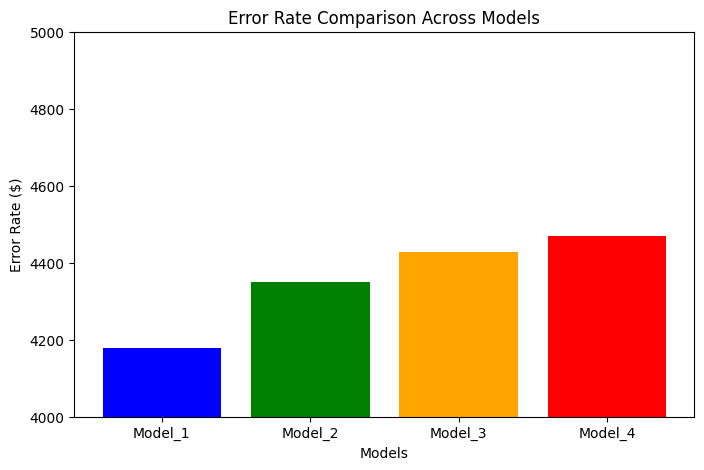

In [ ]:
import matplotlib.pyplot as plt


models = ["Model_1", "Model_2", "Model_3", "Model_4"]
error_rates = [4178.75, 4349.71, 4427.99, 4468.21]


plt.figure(figsize=(8, 5))
plt.bar(models, error_rates, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("Error Rate ($)")
plt.title("Error Rate Comparison Across Models")
plt.ylim(4000, 5000)



In [ ]:
df = data
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
